In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import glob
import os

In [3]:
# buscar los archivos csv
result_files = glob.glob('./results/*.csv', recursive=True)

# Read all files into a dictionary of dataframes
dataframes = {}
for file_path in result_files:
    # Extract filename without extension for the key
    filename = os.path.splitext(os.path.basename(file_path))[0]
    dataframes[filename] = pd.read_csv(file_path)

# Display available dataframes

for name in dataframes.keys():
    print(f"- {name}: shape {dataframes[name].shape}")

# Access individual dataframes like: dataframes['maze1']

- Crazy_var_experiment: shape (45, 10)
- Goal_var_experiment: shape (45, 10)
- Size_var_experiment: shape (45, 10)
- test1: shape (3, 10)
- test2: shape (3, 10)
- Wall_var_experiment: shape (45, 10)


In [4]:
# combinar dataframes
combined_df = pd.concat(dataframes.values(), ignore_index=True)

print(f"Dataframe combinado: {combined_df.shape}")
print("\nPrimeras 5 filas:")
combined_df.head(15)

Dataframe combinado: (186, 10)

Primeras 5 filas:


,algorithm,maze_size,walls,goals,crazy_value,time_ms,peak_memory_kb,solution_length,timeout_reached,run
0,A*,50,875,1,0.1,7.651,44.891,39,False,0
1,A*,50,875,1,0.1,6.341,36.008,39,False,1
2,A*,50,875,1,0.1,6.893,36.045,39,False,2
3,A*,50,875,1,0.1,20.136,36.139,39,False,3
4,A*,50,875,1,0.1,5.741,36.008,39,False,4
5,GA Fast,50,875,1,0.1,31093.712,1974.357,-1,True,0
6,GA Fast,50,875,1,0.1,30126.968,1978.848,-1,True,1
7,GA Fast,50,875,1,0.1,30076.195,1314.982,-1,True,2
8,GA Fast,50,875,1,0.1,31563.657,1847.571,-1,True,3
9,GA Fast,50,875,1,0.1,31882.728,1926.328,-1,True,4


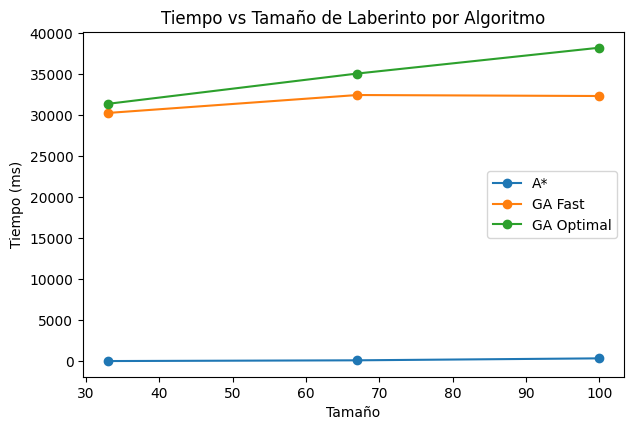

In [18]:
# Grafico con tamaño de laberinto variable

df_size = pd.read_csv('./results/Size_var_experiment.csv')

# df_size = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_size['algorithm'].unique():
    data = df_size[df_size['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('maze_size')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)
plt.title('Tiempo vs Tamaño de Laberinto por Algoritmo')
plt.xlabel('Tamaño')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

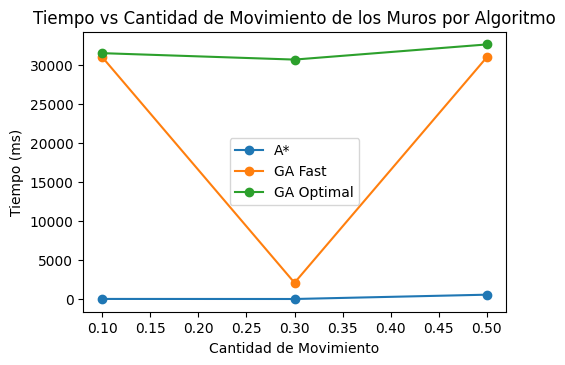

In [21]:
# Grafico con crazy value variable

df_crazy = pd.read_csv('./results/Crazy_var_experiment.csv')

# df_crazy = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_crazy['algorithm'].unique():
    data = df_crazy[df_crazy['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('crazy_value')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Movimiento de los Muros por Algoritmo')
plt.xlabel('Cantidad de Movimiento')
plt.ylabel('Tiempo (ms)')
plt.legend()


# plt.tight_layout()
# plt.show()

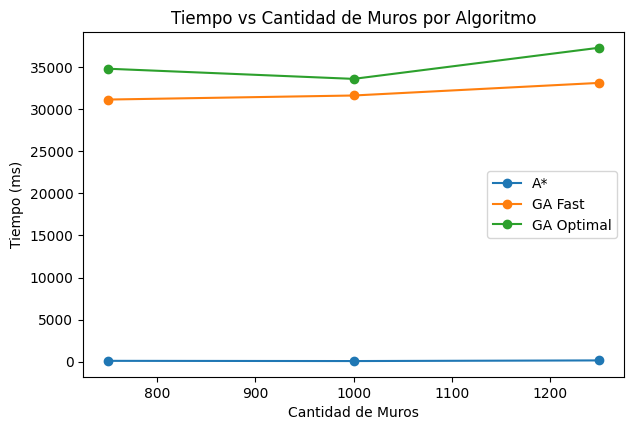

In [15]:
# Grafico con cantidad de muros variable

df_walls = pd.read_csv('./results/Wall_var_experiment.csv')

# df_walls = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_walls['algorithm'].unique():
    data = df_walls[df_walls['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('walls')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Muros por Algoritmo')
plt.xlabel('Cantidad de Muros')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

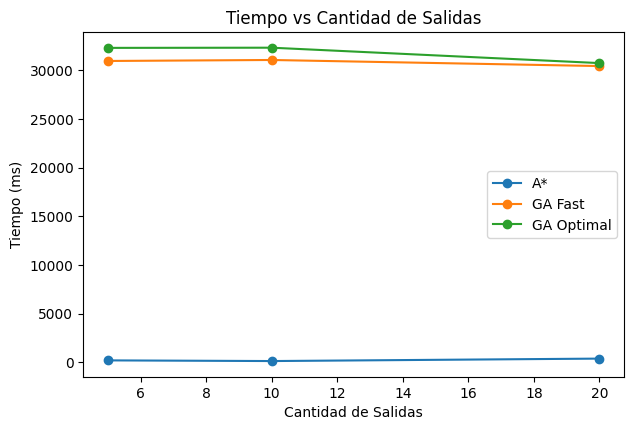

In [8]:
# Grafico con cantidad de metas variable

df_goals = pd.read_csv('./results/Goal_var_experiment.csv')

# df_goals = combined_df

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
for algorithm in df_goals['algorithm'].unique():
    data = df_goals[df_goals['algorithm'] == algorithm]

    # agrupar por el tamaño de laberinto y calcular el promedio del tiempo
    data.groupby('goals')['time_ms'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Cantidad de Salidas')
plt.xlabel('Cantidad de Salidas')
plt.ylabel('Tiempo (ms)')
plt.legend()


plt.tight_layout()
plt.show()

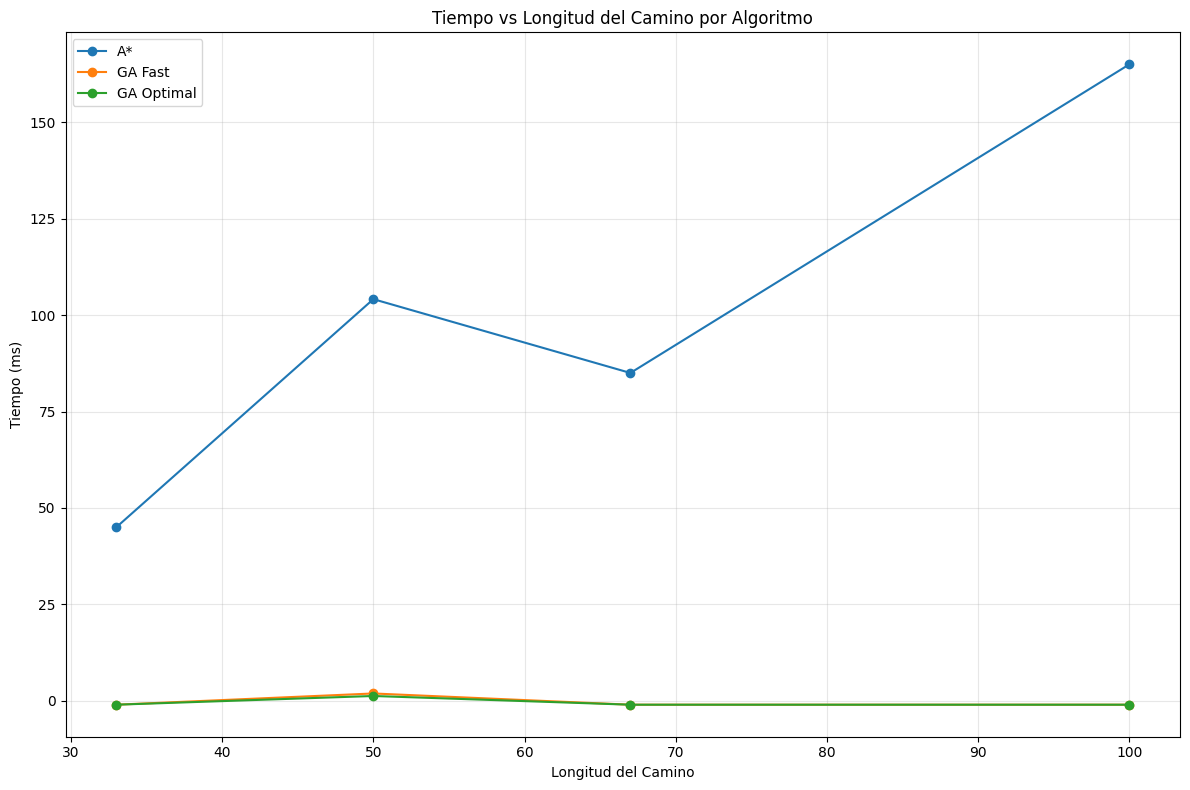

In [26]:
# Gráfico tiempo vs path_length
plt.figure(figsize=(12, 8))

# Usar uno de los dataframes específicos o el combinado
df = combined_df  # o puedes usar df_size, df_crazy, etc.

plt.subplot(1, 1, 1)
for algorithm in df['algorithm'].unique():
    data = df[df['algorithm'] == algorithm]
    
    # Agrupar por path_length y calcular promedio del tiempo
    data.groupby('maze_size')['solution_length'].mean().plot(kind='line', marker='o', label=algorithm)

plt.title('Tiempo vs Longitud del Camino por Algoritmo')
plt.xlabel('Longitud del Camino')
plt.ylabel('Tiempo (ms)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()